Objective Part 1: Do smokers have statistically higher mean individual medical costs billed by health insurance than do non-smokers?

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, stats
from math import sqrt
from numpy import mean, var

In [78]:
data = pd.read_csv("insurance2.csv")
print(data.head())

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891   

                 charges  insuranceclaim  
age             0.299008        0.113723  
sex             0.057292        0.031565  
bmi             0.198341        0.384198  
children        0.067998       -0.409526  
smoker          0.787251        0.333261  
region         -0.006208        0.02089

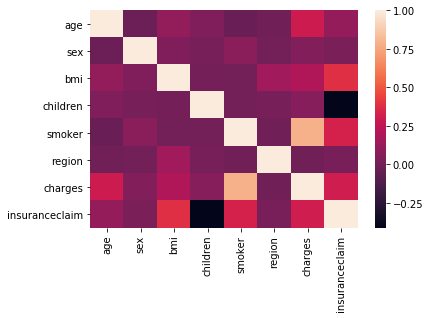

In [79]:
corr = data.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

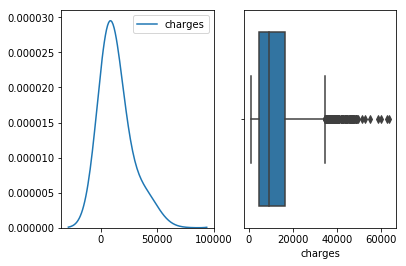

In [80]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(data['charges'], bw=10000, ax=axes[0])
sns.boxplot(data['charges'], ax=axes[1])
plt.show()

In [81]:
#prepare our 2 groups to test
smoker = data[data['smoker']==1]
non_smoker = data[data['smoker']==0]

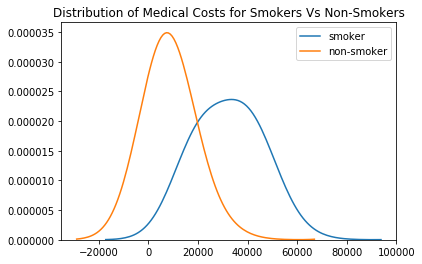

In [82]:
plt.title('Distribution of Medical Costs for Smokers Vs Non-Smokers')
ax = sns.kdeplot(smoker['charges'], bw=10000, label='smoker')
ax = sns.kdeplot(non_smoker['charges'], bw=10000, label='non-smoker')
plt.show()

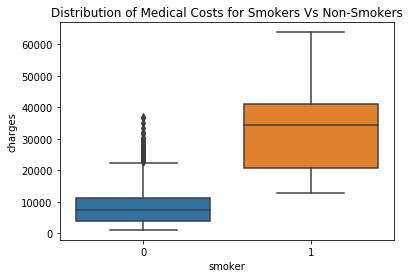

In [83]:
plt.title('Distribution of Medical Costs for Smokers Vs Non-Smokers')
ax = sns.boxplot(x="smoker", y="charges", data=data)

Objective Part 2: Is a person's BMI correlated with individual medical costs billed by health insurance?


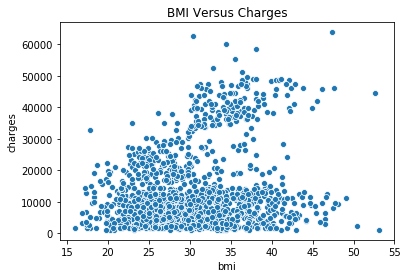

In [84]:
plt.title("BMI Versus Charges")
ax = sns.scatterplot(x="bmi", y="charges", data=data)
plt.show()

In [85]:
data.bmi.corr(data.charges)

0.1983409688336289

In [86]:
def corr_converge(data=data):
    for i in range(0,60000,1000):
        data_new = data[data['charges'] >= i]
        print("lower bound: {} \t correlation coefficient: {} \t number of observations: {}".format(i,data_new.bmi.corr(data_new.charges),len(data_new)))
        pass
    
corr_converge()

lower bound: 0 	 correlation coefficient: 0.1983409688336289 	 number of observations: 1338
lower bound: 1000 	 correlation coefficient: 0.1983409688336289 	 number of observations: 1338
lower bound: 2000 	 correlation coefficient: 0.2071642463813623 	 number of observations: 1246
lower bound: 3000 	 correlation coefficient: 0.2103156094702043 	 number of observations: 1147
lower bound: 4000 	 correlation coefficient: 0.2179847052880895 	 number of observations: 1069
lower bound: 5000 	 correlation coefficient: 0.21979606223533085 	 number of observations: 979
lower bound: 6000 	 correlation coefficient: 0.23402630972840618 	 number of observations: 909
lower bound: 7000 	 correlation coefficient: 0.24403352661404865 	 number of observations: 836
lower bound: 8000 	 correlation coefficient: 0.25427461054363676 	 number of observations: 768
lower bound: 9000 	 correlation coefficient: 0.26741941861024193 	 number of observations: 690
lower bound: 10000 	 correlation coefficient: 0.30737

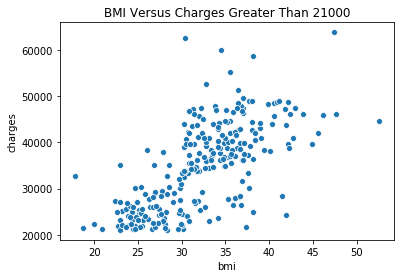

In [87]:
data_new = data[data['charges']>=21000]
plt.title("BMI Versus Charges Greater Than 21000")
ax = sns.scatterplot(x="bmi", y="charges", data=data_new)
plt.show()

In [88]:
data_new.bmi.corr(data_new.charges)

0.6724519995614608

After examining the convergence of correlation coefficients, I looked at charges larger than 21,000 USD. The scatterplot and correlation coefficient reveal a "moderate" positive relationship between bmi and charges larger than 21,000 USD.

Objective part3: Which model is better to predict insurance claim

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [90]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(data[['smoker','bmi']].values, 
                                              data['insuranceclaim'].values,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.7432835820895523


C:\Users\tracy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ypredlr=clf.predict(Xtestlr)
print(confusion_matrix(ytestlr, ypredlr))
print(classification_report(ytestlr, ypredlr))

[[ 95  42]
 [ 44 154]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       137
           1       0.79      0.78      0.78       198

   micro avg       0.74      0.74      0.74       335
   macro avg       0.73      0.74      0.74       335
weighted avg       0.74      0.74      0.74       335



In [92]:
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(Xtestlr)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(ytestlr, y_pred_prob)))

AUC: 0.814366290643663


In [93]:
from sklearn.model_selection import GridSearchCV
import numpy as np
clf = LogisticRegression()
parameters = {
    'C': np.logspace(-2,2,5)
}
print(parameters)
gs = GridSearchCV(clf, param_grid=parameters, cv = 5)
gs.fit(Xlr,ylr)
print("Best C, ", gs.best_params_['C'])

# 
clf = LogisticRegression(C=gs.best_params_['C'])
clf.fit(Xlr, ylr)
print (accuracy_score(clf.predict(Xtestlr),ytestlr))

C:\Users\tracy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}
Best C,  0.1
0.7313432835820896


C:\Users\tracy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tracy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tracy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tracy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tracy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [94]:
np.set_printoptions(precision=3)

Tried StandardScaler to see if Scaler improves the model:

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(Xlr)
X_train_std=sc.transform(Xlr)
X_validation_std=sc.transform(Xtestlr)

In [97]:
lr=LogisticRegression()
lr.fit(X_train_std,ylr)
y_validation_pred=lr.predict(X_validation_std)
print(accuracy_score(y_validation_pred,ytestlr))

0.746268656716418


C:\Users\tracy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xlr, ylr)

print("Test set score: {:.2f}".format(knn.score(Xtestlr, ytestlr)))

Test set score: 0.67


Test k-Nearest Neighbors range 1,10:

In [33]:
for i in range (1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xlr, ylr)

    print("{} Test set score: {:.2f}".format(i, knn.score(Xtestlr, ytestlr)))

1 Test set score: 0.67
2 Test set score: 0.63
3 Test set score: 0.71
4 Test set score: 0.69
5 Test set score: 0.74
6 Test set score: 0.72
7 Test set score: 0.73
8 Test set score: 0.69
9 Test set score: 0.71
10 Test set score: 0.68


The result shows K = 5 has the best score

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xlr, ylr)

print("Test set score: {:.2f}".format(knn.score(Xtestlr, ytestlr)))

Test set score: 0.74


In [ ]:
Making predictions:

In [63]:
X_new = np.array([[0, 33]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 2)


In [64]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)


Prediction: [1]


There is not much difference for LogisticRegression and KNeighborsClassifier. Both model has accuracy of 0.74.

In [74]:
from sklearn import model_selection
#Test options and evaluation metric
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xlr, ylr, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.717792 (0.042692)
KNN: 0.734802 (0.013323)


KNN is better than LR